# Loan Financial Prediction

# Introduction

When a borrower withdraws money from a bank without repaying the loan, this is referred to as a loan default. Due to a variety of reasons, people frequently fail on loans. In addition to harming their credit, defaulting borrowers run the possibility of being sued and having their earnings taken.

A company seeks to predict who would fail to repay a consumer loan. They have knowledge of prior client behavior based on what they've observed. They therefore want to know who is riskier and who isn't when they acquire new customers.

### Importing the libraries needed

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score 
from sklearn.model_selection import train_test_split

### Reading the data

In [2]:
loan_fin = pd.read_csv('Financial_data.csv')

#view a few rows
loan_fin.head()

,Customer ID,Annual income,Credit score,Employment length,Debt-to-income ratio,Loan default
0,1,"$65,000",680,2 years,0.24,0.0
1,2,"$40,000",590,1 year,0.37,1.0
2,3,"$95,000",720,5 years,0.16,0.0
3,4,"$35,000",530,6 months,0.50,1.0
4,5,"$80,000",710,4 years,0.27,0.0


### Understanding the Dataset (Column)

Customer ID: It is a special identifier that a company gives to a customer. Often, it is employed to monitor and manage consumer data, including their interactions, transactions, and interests.

Annual income: The total amount of money a person makes in a year. All forms of income, including wages, salaries, bonuses, tips, and investment income, are included.

Credit score: A credit score is a numerical evaluation of a person's creditworthiness. It is based on data from their credit report, which contains information about their payment history, current debts, and credit history. When deciding on the terms of credit, such as the interest rate and credit limit, lenders use credit scores to assess the risk of giving money to a borrower.

Employment length:It is the period of time they have worked for a specific employer. It is frequently considered when analyzing creditworthiness or when doing a background check for a job application.

Debt-to-income ratio: A person's monthly debt payments are compared against their monthly income using this financial metric. Lenders frequently use it to determine a borrower's capacity for budgeting their debt and making timely payments.

Loan default: When a borrower fails to return a loan in accordance with the terms set forth, this is referred to as loan default. When a borrower defaults on a loan, they have neglected to make preparations to make up any missed payments.

### Understanding the Dataset in General


In [3]:
#Verify how many rows and columns our dataset has.

print(loan_fin.shape)

(58, 6)


 It indicates that our dataset has 58 rows and 6 columns.

In [4]:
# Examining the data information

loan_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer ID           58 non-null     int64  
 1   Annual income         57 non-null     object 
 2   Credit score          58 non-null     int64  
 3   Employment length     57 non-null     object 
 4   Debt-to-income ratio  57 non-null     float64
 5   Loan default          57 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 2.8+ KB


We have 4 numeric and 2 strings in the dataset.

In [5]:
#Let's check for missing values

loan_fin.isnull().sum()

Customer ID             0
Annual income           1
Credit score            0
Employment length       1
Debt-to-income ratio    1
Loan default            1
dtype: int64

This is aimed at showing that there is one missing value for each of the following: Annual income, Employment length, Debt-to-Income, and Loan Default. We will come back to that later

In [6]:
loan_fin.describe()

,Customer ID,Credit score,Debt-to-income ratio,Loan default
count,58.000000,58.000000,57.000000,57.000000
mean,29.500000,674.310345,0.296667,0.298246
std,16.886879,80.461652,0.116792,0.461555
min,1.000000,520.000000,0.110000,0.000000
25%,15.250000,610.000000,0.200000,0.000000
50%,29.500000,695.000000,0.280000,0.000000
75%,43.750000,730.000000,0.380000,1.000000
max,58.000000,800.000000,0.520000,1.000000


## Cleaning the dataset

Let's view our data again

In [7]:
loan_fin.tail()

,Customer ID,Annual income,Credit score,Employment length,Debt-to-income ratio,Loan default
53,54,"$55,000",640,2 years,0.33,0.0
54,55,"$48,000",610,1 year,0.38,1.0
55,56,"$70,000",710,NaN,0.28,0.0
56,57,"$42,000",540,6 months,0.47,1.0
57,58,"$85,000",780,5 years,0.18,NaN


The Customer iD is unnecessary, as shown in the dataset, so we remove it. The annual income also need some cleaning, as does the Employment length.

In [8]:
#let's drop Customer ID

loan_fin.drop(labels = ['Customer ID'], axis =1, inplace =True)


In [9]:
#for annual income, we need to remove the dollar sign and comma for easy access
loan_fin['Annual income'] = loan_fin['Annual income'].str.replace(",", "")
loan_fin['Annual income'] = loan_fin['Annual income'].str.replace('$','')


C:\Users\DELL\AppData\Local\Temp\ipykernel_9484\2559370682.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  loan_fin['Annual income'] = loan_fin['Annual income'].str.replace('$','')


In [10]:
#
employs = ['years', 'year', 'months']
for employ in employs:
    loan_fin['Employment length'] = loan_fin['Employment length'].str.replace(employ, '')
loan_fin.head()    

,Annual income,Credit score,Employment length,Debt-to-income ratio,Loan default
0,65000,680,2,0.24,0.0
1,40000,590,1,0.37,1.0
2,95000,720,5,0.16,0.0
3,35000,530,6,0.50,1.0
4,80000,710,4,0.27,0.0


We are done with the cleaning of our dataset, let's go back to our missing values

In [11]:
loan_fin.isnull().sum()

Annual income           1
Credit score            0
Employment length       1
Debt-to-income ratio    1
Loan default            1
dtype: int64

Let's fill our missing values

In [12]:
mean =loan_fin['Debt-to-income ratio'].mean()
loan_fin['Debt-to-income ratio']= loan_fin['Debt-to-income ratio'].fillna(mean)
loan_fin['Debt-to-income ratio'] = loan_fin['Debt-to-income ratio'].map(lambda x: '{:.2f}'.format(x))

In [13]:
loan_fin = loan_fin.drop(41)

In [14]:
loan_fin = loan_fin.drop(55)

In [15]:
mean =loan_fin['Loan default'].mean()
loan_fin['Loan default']= loan_fin['Loan default'].fillna(mean)


In [16]:
loan_fin['Loan default'] = loan_fin['Loan default'].astype(int)

In [17]:
loan_fin.reset_index()

,index,Annual income,Credit score,Employment length,Debt-to-income ratio,Loan default
0,0,65000,680,2,0.24,0
1,1,40000,590,1,0.37,1
2,2,95000,720,5,0.16,0
3,3,35000,530,6,0.50,1
4,4,80000,710,4,0.27,0
5,5,55000,650,3,0.32,0
6,6,100000,750,6,0.15,0
7,7,45000,600,1,0.42,1
8,8,110000,790,7,0.12,0
9,9,75000,700,3,0.28,0


In [18]:
loan_fin.columns

Index(['Annual income', 'Credit score', 'Employment length',
       'Debt-to-income ratio', 'Loan default'],
      dtype='object')

In [19]:
loan_fin['Annual income'] = loan_fin['Annual income'].astype(int)
loan_fin['Employment length'] = loan_fin['Employment length'].astype(int)

In [20]:
loan_fin.head()

,Annual income,Credit score,Employment length,Debt-to-income ratio,Loan default
0,65000,680,2,0.24,0
1,40000,590,1,0.37,1
2,95000,720,5,0.16,0
3,35000,530,6,0.50,1
4,80000,710,4,0.27,0


## Visualizing the data

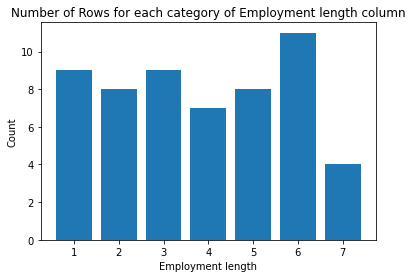

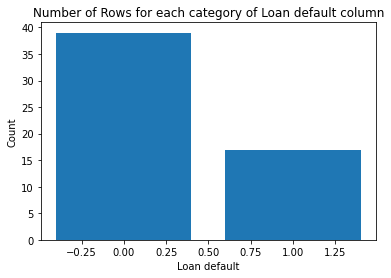

In [21]:
%matplotlib inline
categorical_cols = ['Employment length', 'Loan default']

# Loop through each categorical column and create a bar chart
for col in categorical_cols:
    # Count the number of rows for each category of the column
    col_counts = loan_fin[col].value_counts()

    # Create a bar chart using Matplotlib
    plt.bar(col_counts.index, col_counts.values)

    # Add labels and title
    plt.title(f'Number of Rows for each category of {col} column')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Display the chart
    plt.show()

<AxesSubplot:>

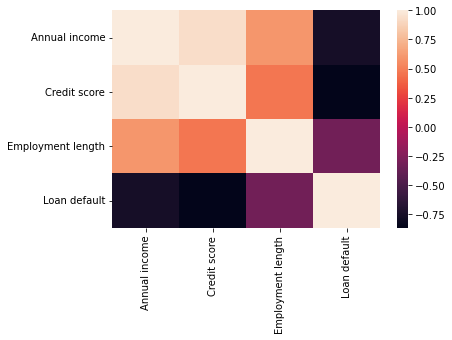

In [22]:
sns.heatmap(loan_fin.corr())


### Splitting the data into train and test splits

The performance of machine learning models relevant to prediction-based algorithms is evaluated using the train-test split. We can compare the outputs of our own machine learning model to those of other machines using this quick and easy method. By default, 20% of the genuine data are included in the test set, while 80% of the real data are included in the training set.

In [23]:
X = loan_fin.drop(labels = ['Loan default'], axis = 1)
y = loan_fin['Loan default']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 8)

### KNeighbors Classifier

KNeighborsClassifier is a machine learning method for classification tasks that is a member of the instance-based or lazy learning algorithm family. The technique finds the k-nearest neighbors of a new data point based on a similarity metric (for example, Euclidean distance) and uses the class labels of these neighbors to predict the class label of the new data point. To utilize the KNeighborsClassifier in scikit-learn, we must first create an instance of the classifier and set the value of the n neighbors parameter to the desired value of k. Finally, using the fit() method, which takes the training data and the matching class labels as parameters, we must fit the model to our training data. The predict() method can be used to forecast the class label of fresh data points after the model has been trained.

#### We are going to train the model and predicting outcomes.

In [26]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [27]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [28]:
y_pred = knn.predict(X_test)

#### we check the roc_auc score.

In [29]:
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

AUC Score: 95.0


Combine both the actual and predicted 

In [30]:
combined = pd.DataFrame({'Actual':y_test,
                         'Predicted': y_pred})
combined

,Actual,Predicted
24,1,1
23,0,0
12,0,0
16,0,0
49,0,0
57,0,0
25,0,0
1,1,1
22,0,0
33,0,0


## Conclusion

1. The roc auc score demonstrates that the model is applicable to the company's loan default risk.


2. The roc auc score for the test set for the k-NN model on the loan default task was 95%, indicating a respectable performance. This demonstrates that the model can identify patterns in the data to predict a loan risk default with roc auc.


3. This concept offers advantages and disadvantages when applied to actual loan default scenarios. On the one hand, it might be a useful tool for locating clients who have a high risk of defaulting on a loan. The model, however, depends on accurate and up-to-date data, and it might be limited by data errors or by the fact that it ignores other factors that could affect a loan default. It's also crucial to keep in mind that machine learning models do not always have perfect accuracy and sometimes make errors. These errors could have major consequences in the event of a loan default.


4. And hence, it is essential to carefully evaluate the model's performance and take into consideration its limits before applying it to a real-world scenario.